In [1]:
import pandas as pd
df = pd.read_csv('C:\\gab\\train.csv',
                   sep=',', 
                   header=None, 
                   names=['article', 'label'],
                   encoding='ISO-8859-1')
df1 = pd.read_csv('C:\\gab\\test.csv',
                   sep=',', 
                   header=None, 
                   names=['article', 'label'],
                   encoding='ISO-8859-1')
df2 = pd.read_csv('C:\\gab\\dev.csv',
                   sep=',', 
                   header=None, 
                   names=['article', 'label'],
                   encoding='ISO-8859-1')

In [2]:
df.shape

(19093, 2)

In [3]:
df1.shape

(4133, 2)

In [4]:
df2.shape

(4052, 2)

In [5]:

df.head(10)

,article,label
0,What's wrong with that? It's History you know....,0
1,"Switzerland, I'm guessing ? if so, an outlier ...",0
2,What are they selling ? Are? they trying to? m...,0
3,http://bit.do/b7ndm: Dr. Paul Powers is back i...,0
4,@support? the prompt for browser notifications...,0
5,"I really hope against all hope, that Sessions ...",0
6,Italy: Mass Deportation Of Migrants May Start ...,0
7,A Sith Lord's level of mental illness...,0
8,"I don't endorse any of the links on this site,...",0
9,Maybe it's me being a bit jaded because I'm in...,0


In [6]:
df1.head(10)

,article,label
0,Please go to Dane's website at www.geoengineer...,0
1,Anybody else sick of online product launch vid...,1
2,"Hold on #GabFam I am just getting warm, blowin...",0
3,Democrat Party exists for the media's globalis...,0
4,Relegion of open and 'lawful' child sexual abu...,1
5,https://www.bitchute.com/video/not1pbGQA9uE/ ...,0
6,Can't wait to see former Tory MP's crying woe ...,0
7,There's a phrase being used right now that I t...,0
8,https://rickyrescue.com/florida-state-fire-cer...,0
9,"Look, gun grabbers. I have wasted a lot of bre...",1


In [7]:
df2.head(10)

,article,label
0,"Lewis's brother, Charles, King of Italy (also ...",0
1,I hope the person who invented wallpaper is ex...,0
2,"Same reason we never told you about the ""Holoc...",0
3,Anamorph - A game of perspective. The fun of a...,0
4,Yes he should he is working against the Presid...,0
5,What does ¡®acting like Californians¡¯ mean?,0
6,I guess I'll do a small rundown from the stuff...,0
7,He is still ignoring the communists... except ...,0
8,Radio Derb Transcript Up: Explaining Discharge...,0
9,found it. http://www.whsports.se channel...,0


In [8]:

label_counts = pd.DataFrame(df['label'].value_counts())
label_counts

,label
0,16898
1,2195


In [9]:
label_counts = pd.DataFrame(df1['label'].value_counts())
label_counts

,label
0,3658
1,475


In [10]:
label_counts = pd.DataFrame(df2['label'].value_counts())
label_counts

,label
0,3577
1,475


In [11]:

label_values = list(label_counts.index)
order = list(pd.DataFrame(df['label'].value_counts()).index)
label_values = [l for _,l in sorted(zip(order, label_values))]

label_values

[0, 1]

In [12]:

label_values = list(label_counts.index)
order = list(pd.DataFrame(df1['label'].value_counts()).index)
label_values = [l for _,l in sorted(zip(order, label_values))]

label_values

[0, 1]

In [13]:

label_values = list(label_counts.index)
order = list(pd.DataFrame(df2['label'].value_counts()).index)
label_values = [l for _,l in sorted(zip(order, label_values))]

label_values

[0, 1]

In [14]:
texts = df['article'].values
labels = df['label'].values

In [15]:
texts1 = df1['article'].values
labels1 = df1['label'].values

In [16]:
texts2 = df2['article'].values
labels2 = df2['label'].values

In [17]:

text_lengths = [len(texts[i].split()) for i in range(len(texts))]
print(min(text_lengths))
print(max(text_lengths))

1
894


In [18]:
text_lengths1 = [len(texts1[i].split()) for i in range(len(texts1))]
print(min(text_lengths1))
print(max(text_lengths1))

1
353


In [19]:
text_lengths2 = [len(texts2[i].split()) for i in range(len(texts2))]
print(min(text_lengths2))
print(max(text_lengths2))

1
815


In [20]:
sum([1 for i in range(len(text_lengths)) if text_lengths[i] >= 300])

7

In [21]:
sum([1 for i in range(len(text_lengths1)) if text_lengths1[i] >= 300])

1

In [22]:
sum([1 for i in range(len(text_lengths2)) if text_lengths2[i] >= 300])

3

In [23]:

from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

print('Original Text: ', texts[0], '\n')
print('Tokenized Text: ', tokenizer.tokenize(texts[0]), '\n')
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[0])))

Original Text:  What's wrong with that? It's History you know. Mary Beard told me so and she has a vagina from Oxford. 

Tokenized Text:  ['what', "'", 's', 'wrong', 'with', 'that', '?', 'it', "'", 's', 'history', 'you', 'know', '.', 'mary', 'beard', 'told', 'me', 'so', 'and', 'she', 'has', 'a', 'va', '##gina', 'from', 'oxford', '.'] 

Token IDs:  [2054, 1005, 1055, 3308, 2007, 2008, 1029, 2009, 1005, 1055, 2381, 2017, 2113, 1012, 2984, 10154, 2409, 2033, 2061, 1998, 2016, 2038, 1037, 12436, 20876, 2013, 4345, 1012]


In [24]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

print('Original Text: ', texts1[0], '\n')
print('Tokenized Text: ', tokenizer.tokenize(texts1[0]), '\n')
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts1[0])))

Original Text:  Please go to Dane's website at www.geoengineering.org and educate yourselves on this global crime, it's your children's, and their children's lives at risk. Thank you.  

Tokenized Text:  ['please', 'go', 'to', 'dane', "'", 's', 'website', 'at', 'www', '.', 'geo', '##eng', '##ine', '##ering', '.', 'org', 'and', 'educate', 'yourselves', 'on', 'this', 'global', 'crime', ',', 'it', "'", 's', 'your', 'children', "'", 's', ',', 'and', 'their', 'children', "'", 's', 'lives', 'at', 'risk', '.', 'thank', 'you', '.'] 

Token IDs:  [3531, 2175, 2000, 14569, 1005, 1055, 4037, 2012, 7479, 1012, 20248, 13159, 3170, 7999, 1012, 8917, 1998, 16957, 25035, 2006, 2023, 3795, 4126, 1010, 2009, 1005, 1055, 2115, 2336, 1005, 1055, 1010, 1998, 2037, 2336, 1005, 1055, 3268, 2012, 3891, 1012, 4067, 2017, 1012]


In [25]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

print('Original Text: ', texts2[0], '\n')
print('Tokenized Text: ', tokenizer.tokenize(texts2[0]), '\n')
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts2[0])))

Original Text:  Lewis's brother, Charles, King of Italy (also known as Charles the Fat, as he was an obese slob) sat by idly while all this was happening and did nothing.? The Pope gave him the title of Emperor, hoping he this would spur him to action, but still he did nothing.? When Lewis died, Charles became ruler over his lands as well.? Messengers hastened to him, begging him to come save his people from d... 

Tokenized Text:  ['lewis', "'", 's', 'brother', ',', 'charles', ',', 'king', 'of', 'italy', '(', 'also', 'known', 'as', 'charles', 'the', 'fat', ',', 'as', 'he', 'was', 'an', 'obe', '##se', 'sl', '##ob', ')', 'sat', 'by', 'id', '##ly', 'while', 'all', 'this', 'was', 'happening', 'and', 'did', 'nothing', '.', '?', 'the', 'pope', 'gave', 'him', 'the', 'title', 'of', 'emperor', ',', 'hoping', 'he', 'this', 'would', 'spur', 'him', 'to', 'action', ',', 'but', 'still', 'he', 'did', 'nothing', '.', '?', 'when', 'lewis', 'died', ',', 'charles', 'became', 'ruler', 'over', 'his', 'lan

In [26]:


text_ids = [tokenizer.encode(text, max_length=100, pad_to_max_length=True) for text in texts]

text_ids[0]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\transformers\tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


[101,
 2054,
 1005,
 1055,
 3308,
 2007,
 2008,
 1029,
 2009,
 1005,
 1055,
 2381,
 2017,
 2113,
 1012,
 2984,
 10154,
 2409,
 2033,
 2061,
 1998,
 2016,
 2038,
 1037,
 12436,
 20876,
 2013,
 4345,
 1012,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [27]:
text_ids1 = [tokenizer.encode(text, max_length=100, pad_to_max_length=True) for text in texts1]

text_ids1[0]

[101,
 3531,
 2175,
 2000,
 14569,
 1005,
 1055,
 4037,
 2012,
 7479,
 1012,
 20248,
 13159,
 3170,
 7999,
 1012,
 8917,
 1998,
 16957,
 25035,
 2006,
 2023,
 3795,
 4126,
 1010,
 2009,
 1005,
 1055,
 2115,
 2336,
 1005,
 1055,
 1010,
 1998,
 2037,
 2336,
 1005,
 1055,
 3268,
 2012,
 3891,
 1012,
 4067,
 2017,
 1012,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [28]:
text_ids2 = [tokenizer.encode(text, max_length=100, pad_to_max_length=True) for text in texts2]

text_ids2[0]

[101,
 4572,
 1005,
 1055,
 2567,
 1010,
 2798,
 1010,
 2332,
 1997,
 3304,
 1006,
 2036,
 2124,
 2004,
 2798,
 1996,
 6638,
 1010,
 2004,
 2002,
 2001,
 2019,
 15578,
 3366,
 22889,
 16429,
 1007,
 2938,
 2011,
 8909,
 2135,
 2096,
 2035,
 2023,
 2001,
 6230,
 1998,
 2106,
 2498,
 1012,
 1029,
 1996,
 4831,
 2435,
 2032,
 1996,
 2516,
 1997,
 3750,
 1010,
 5327,
 2002,
 2023,
 2052,
 12996,
 2032,
 2000,
 2895,
 1010,
 2021,
 2145,
 2002,
 2106,
 2498,
 1012,
 1029,
 2043,
 4572,
 2351,
 1010,
 2798,
 2150,
 7786,
 2058,
 2010,
 4915,
 2004,
 2092,
 1012,
 1029,
 28938,
 24748,
 7228,
 2000,
 2032,
 1010,
 12858,
 2032,
 2000,
 2272,
 3828,
 2010,
 2111,
 2013,
 1040,
 1012,
 1012,
 1012,
 102]

In [29]:

text_ids_lengths = [len(text_ids[i]) for i in range(len(text_ids))]
print(min(text_ids_lengths))
print(max(text_ids_lengths))

100
100


In [30]:
text_ids_lengths1 = [len(text_ids1[i]) for i in range(len(text_ids1))]
print(min(text_ids_lengths1))
print(max(text_ids_lengths1))

100
100


In [31]:
text_ids_lengths2 = [len(text_ids2[i]) for i in range(len(text_ids2))]
print(min(text_ids_lengths2))
print(max(text_ids_lengths2))

100
100


In [32]:
att_masks = []
for ids in text_ids:
    masks = [int(id > 0) for id in ids]
    att_masks.append(masks)
    
att_masks[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [33]:
att_masks1 = []
for ids in text_ids1:
    masks = [int(id > 0) for id in ids]
    att_masks1.append(masks)
    
att_masks1[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [34]:
att_masks2 = []
for ids in text_ids2:
    masks = [int(id > 0) for id in ids]
    att_masks2.append(masks)
    
att_masks2[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [35]:
#from sklearn.model_selection import train_test_split

#train_x, test_val_x, train_y, test_val_y = train_test_split(text_ids, labels, random_state=111, test_size=0.2)
#train_m, test_val_m = train_test_split(att_masks, random_state=111, test_size=0.2)

#test_x, val_x, test_y, val_y = train_test_split(test_val_x, test_val_y, random_state=111, test_size=0.5)
#test_m, val_m = train_test_split(test_val_m, random_state=111, test_size=0.5)

In [36]:
train_x = text_ids
train_y = labels
train_m = att_masks

val_x = text_ids1
val_y = labels1
val_m = att_masks1

test_x = text_ids2
test_y = labels2
test_m = att_masks2

In [37]:
import torch

train_x = torch.tensor(train_x)
test_x = torch.tensor(test_x)
val_x = torch.tensor(val_x)
train_y = torch.tensor(train_y)
test_y = torch.tensor(test_y)
val_y = torch.tensor(val_y)
train_m = torch.tensor(train_m)
test_m = torch.tensor(test_m)
val_m = torch.tensor(val_m)

print(train_x.shape)
print(test_x.shape)
print(val_x.shape)
print(train_y.shape)
print(test_y.shape)
print(val_y.shape)
print(train_m.shape)
print(test_m.shape)
print(val_m.shape)

torch.Size([19093, 100])
torch.Size([4052, 100])
torch.Size([4133, 100])
torch.Size([19093])
torch.Size([4052])
torch.Size([4133])
torch.Size([19093, 100])
torch.Size([4052, 100])
torch.Size([4133, 100])


In [38]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_x, train_m, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_x, val_m, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [39]:
from transformers import DistilBertForSequenceClassification, AdamW, DistilBertConfig

num_labels = len(set(labels))

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels,
                                                            output_attentions=False, output_hidden_states=False)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = model.to(device)

cpu


In [41]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of trainable parameters:', count_parameters(model), '\n', model)

Number of trainable parameters: 66955010 
 DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (drop

In [42]:
[n for n, p in model.named_parameters()]

['distilbert.embeddings.word_embeddings.weight',
 'distilbert.embeddings.position_embeddings.weight',
 'distilbert.embeddings.LayerNorm.weight',
 'distilbert.embeddings.LayerNorm.bias',
 'distilbert.transformer.layer.0.attention.q_lin.weight',
 'distilbert.transformer.layer.0.attention.q_lin.bias',
 'distilbert.transformer.layer.0.attention.k_lin.weight',
 'distilbert.transformer.layer.0.attention.k_lin.bias',
 'distilbert.transformer.layer.0.attention.v_lin.weight',
 'distilbert.transformer.layer.0.attention.v_lin.bias',
 'distilbert.transformer.layer.0.attention.out_lin.weight',
 'distilbert.transformer.layer.0.attention.out_lin.bias',
 'distilbert.transformer.layer.0.sa_layer_norm.weight',
 'distilbert.transformer.layer.0.sa_layer_norm.bias',
 'distilbert.transformer.layer.0.ffn.lin1.weight',
 'distilbert.transformer.layer.0.ffn.lin1.bias',
 'distilbert.transformer.layer.0.ffn.lin2.weight',
 'distilbert.transformer.layer.0.ffn.lin2.bias',
 'distilbert.transformer.layer.0.output_laye

In [43]:
learning_rate = 1e-5
adam_epsilon = 1e-8

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.2},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, eps=adam_epsilon)

In [44]:
from transformers import get_linear_schedule_with_warmup

num_epochs = 3
total_steps = len(train_dataloader) * num_epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [45]:

import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [46]:
import numpy as np
import random

seed_val = 111

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [47]:


train_losses = []
val_losses = []
num_mb_train = len(train_dataloader)
num_mb_val = len(val_dataloader)

if num_mb_val == 0:
    num_mb_val = 1

for n in range(num_epochs):
    train_loss = 0
    val_loss = 0
    start_time = time.time()
    
    for k, (mb_x, mb_m, mb_y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        model.train()
        
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)
        
        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        
        loss = outputs[0]
        #loss = model_loss(outputs[1], mb_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        
        train_loss += loss.data / num_mb_train
    
    print ("\nTrain loss after itaration %i: %f" % (n+1, train_loss))
    train_losses.append(train_loss.cpu())
    
    with torch.no_grad():
        model.eval()
        
        for k, (mb_x, mb_m, mb_y) in enumerate(val_dataloader):
            mb_x = mb_x.to(device)
            mb_m = mb_m.to(device)
            mb_y = mb_y.to(device)
        
            outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
            
            loss = outputs[0]
            #loss = model_loss(outputs[1], mb_y)
            
            val_loss += loss.data / num_mb_val
            
        print ("Validation loss after itaration %i: %f" % (n+1, val_loss))
        val_losses.append(val_loss.cpu())
    
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Time: {epoch_mins}m {epoch_secs}s')


Train loss after itaration 1: 0.277273
Validation loss after itaration 1: 0.234386
Time: 74m 39s

Train loss after itaration 2: 0.219127
Validation loss after itaration 2: 0.229468
Time: 73m 50s

Train loss after itaration 3: 0.193387
Validation loss after itaration 3: 0.237963
Time: 74m 3s


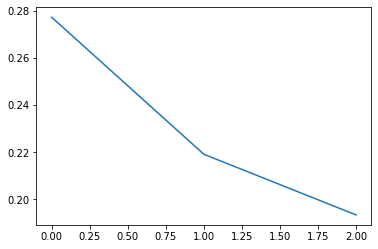

In [48]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(train_losses)

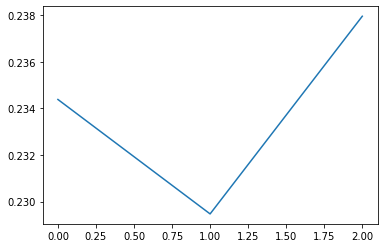

In [49]:
plt.figure()
plt.plot(val_losses)

In [50]:
batch_size = 32

test_data = TensorDataset(test_x, test_m)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

outputs = []
with torch.no_grad():
    model.eval()
    for k, (mb_x, mb_m) in enumerate(test_dataloader):
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        output = model(mb_x, attention_mask=mb_m)
        outputs.append(output[0].to('cpu'))

outputs = torch.cat(outputs)

In [51]:
_, predicted_values = torch.max(outputs, 1)
predicted_values = predicted_values.numpy()
true_values = test_y.numpy()

In [52]:
test_accuracy = np.sum(predicted_values == true_values) / len(true_values)
print ("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9067127344521224


In [53]:
from sklearn.metrics import classification_report

print(classification_report(true_values, predicted_values, target_names=[str(l) for l in label_values]))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3577
           1       0.65      0.45      0.53       475

    accuracy                           0.91      4052
   macro avg       0.79      0.71      0.74      4052
weighted avg       0.90      0.91      0.90      4052

